# Image Segmentation using K Means Algorithm

### What is the K-Means Algorithm?
The K-Means Algorithm is a popular unsupervised machine learning method used for clustering data into k distinct groups. It works by partitioning a dataset such that data points in the same cluster are more similar to each other than to those in other clusters. In the context of image segmentation, K-Means is used to group similar pixel intensities, effectively segmenting the image into regions with distinct characteristics (e.g., intensity or color ranges).

### Steps of the K-Means Algorithm:
#### 1. Initialization:
    Select k random points from the dataset as initial centroids (cluster centers). These are guesses for where the center of each cluster lies.

#### 2. Assignment:
    For each data point (in this case, pixel intensity values), calculate its distance to each centroid using a distance metric (e.g., Euclidean distance).
    Assign the data point to the cluster of the nearest centroid.

#### 3. Update Centroids:
    Compute the mean of all the points in each cluster and update the centroid location to this mean. The centroids move closer to the "true" center of the clusters.

#### 4. Repeat Until Convergence:
    Repeat steps 2 and 3 until the centroids stabilize (i.e., they no longer change significantly between iterations) or a maximum number of iterations is reached.

#### 5.Evaluation and Segmentation:
    After convergence, the data points are grouped into k clusters. In image segmentation, these clusters correspond to distinct pixel intensity groups.
    Map the clustered data back to the image dimensions to visualize the segmented image.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

In [2]:
im = cv2.resize(cv2.imread('berbarian.webp',0), (512,512))

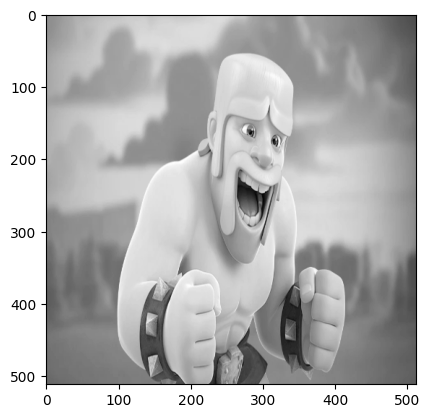

In [3]:
plt.imshow(im,cmap='gray')
plt.show()

In [4]:
pixels=im.reshape(im.size,1)
pixels
k = 5

In [5]:
inertia=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit(pixels)
    inertia.append(km.inertia_)

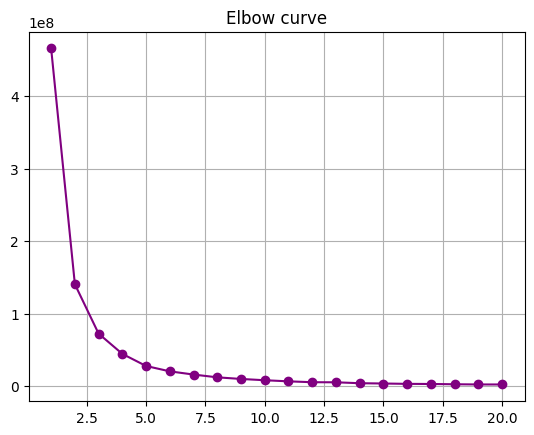

In [6]:
plt.plot(range(1,21),inertia,color='purple', marker='o')
plt.title('Elbow curve')
plt.grid(True)
plt.show()

In [7]:
km=KMeans(n_clusters=k)


In [8]:
km.fit(pixels)

KMeans(n_clusters=5)

In [9]:
km.inertia_

27948131.5160212

In [10]:
km.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [11]:
pixels.shape

(262144, 1)

In [12]:
df=pd.DataFrame(data=im.ravel(),columns=["Pixel"])
df['Cluster']=km.labels_

In [13]:
df.head()

,Pixel,Cluster
0,141,0
1,141,0
2,141,0
3,142,0
4,142,0


In [14]:
pixrange=[]
for i in range(k):
    m1=df[df.Cluster==i]["Pixel"].max()
    m2=df[df.Cluster==i]["Pixel"].min()
    pixrange.append((m1,m2))

In [15]:
pixrange

[(167, 135), (254, 200), (92, 1), (199, 168), (134, 93)]

In [16]:
def assignnew(x,list1):
     for i in range(len(list1)):
            if x<=list1[i][0] and x>=list1[i][1]:
                return i 

In [17]:
df['Caption']=df['Pixel'].apply(assignnew,args=[pixrange])
df

,Pixel,Cluster,Caption
0,141,0,0
1,141,0,0
2,141,0,0
3,142,0,0
4,142,0,0
...,...,...,...
262139,92,2,2
262140,92,2,2
262141,92,2,2
262142,90,2,2


In [18]:
new_Image = np.array(df['Caption']).reshape(im.shape)

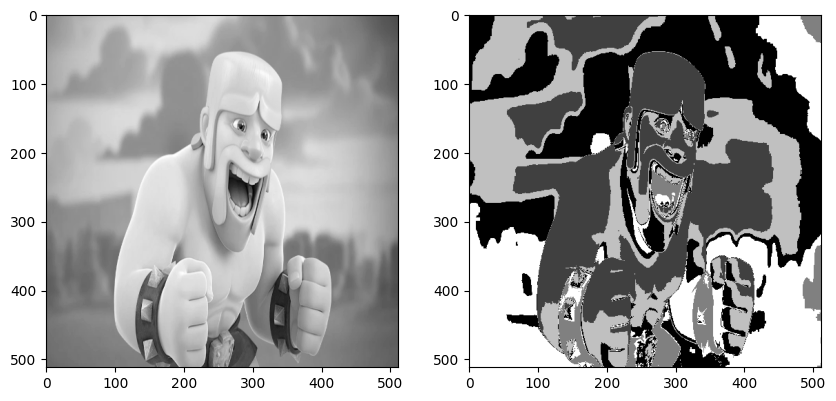

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_Image, cmap='gray')
plt.show()